In [74]:
from tools.data import get_datasets

train, test = get_datasets()

Reading data file


In [75]:
%matplotlib inline

import matplotlib.pyplot as plt

In [76]:
# Classification -1 vs >=0
# on prépare les données:
# tout ce qui est un chiffre -> 1
# tout ce qui est du bruit -> 0
import numpy as np

train[train[:,-1] >= 0,-1] =  0
test[test[:,-1] >= 0,-1] =  0

train[:,-1] = train[:,-1] + 1
test[:,-1] = test[:,-1] + 1

In [77]:
def plot_fourier(n):
    length = train[n,0]

    plt.figure(figsize=(15,10))
    fourier = np.fft.fft(train[n, 1:1+length])
    plt.plot(np.abs(fourier[1:]))

    fourier = np.fft.fft(train[n, 1+512:1+512+length])
    plt.plot(np.abs(fourier[1:]))

    fourier = np.fft.fft(train[n, 1+512*2:1+512*2+length])
    plt.plot(np.abs(fourier[1:]))

    fourier = np.fft.fft(train[n, 1+512*3:1+512*3+length])
    plt.plot(np.abs(fourier[1:]))
    plt.show()

/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


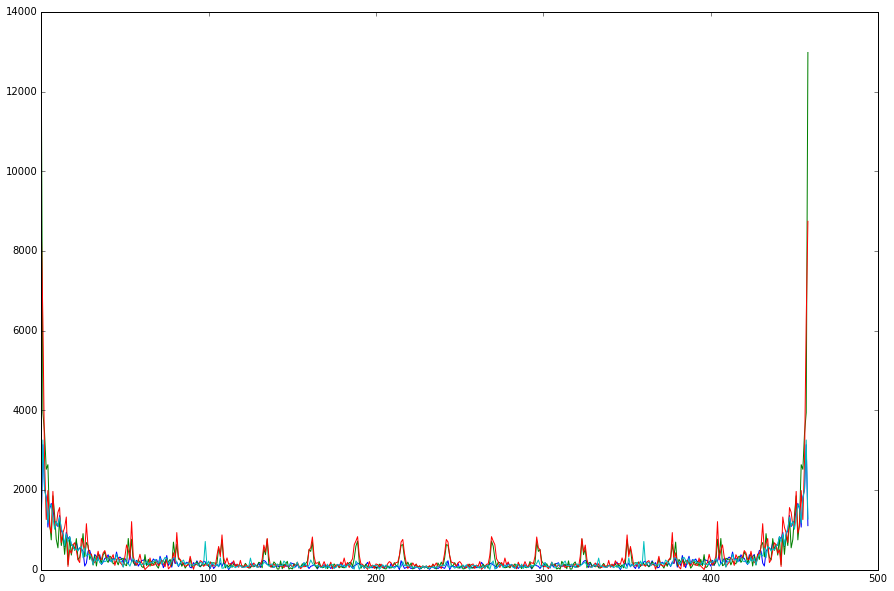

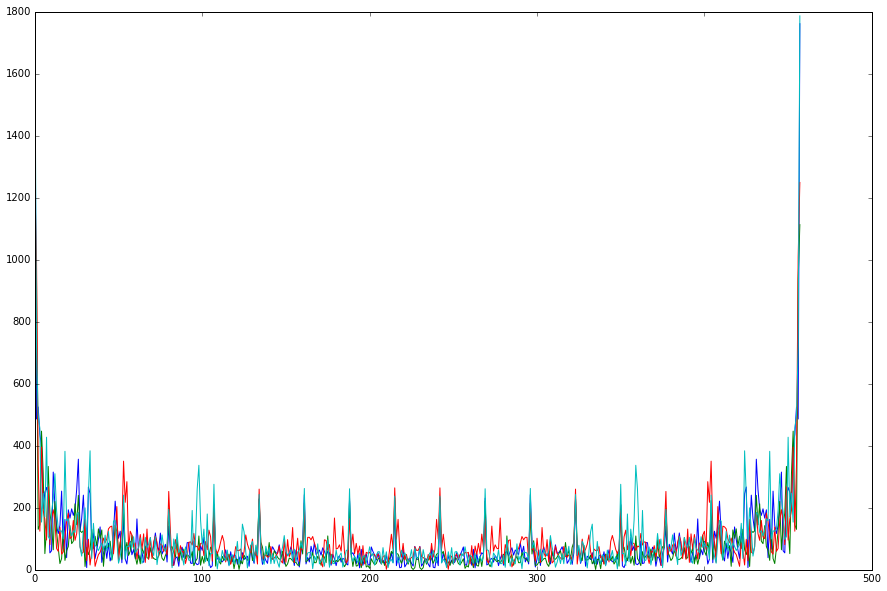

In [78]:
plot_fourier(43)
plot_fourier(23)

In [79]:
train_f = np.zeros(train.shape)

for i in range(len(train_f)):
    length = train[i,0]
    train_f[i,0] = train[i,0]
    train_f[i,-1] = train[i,-1]
    
    for j in range(4):
        train_f[i, 1+512*j:1+512*j+length] = np.abs(np.fft.fft(train[i, 1+512*j:1+512*j+length]))
        
test_f = np.zeros(test.shape)

for i in range(len(test_f)):
    length = test[i,0]
    test_f[i,0] = test[i,0]
    test_f[i,-1] = test[i,-1]
    
    for j in range(4):
        test_f[i, 1+512*j:1+512*j+length] = np.abs(np.fft.fft(test[i, 1+512*j:1+512*j+length]))

/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [80]:
from sklearn.decomposition import PCA

pca_train = PCA(5)
train_principal = pca.fit_transform(train_f[:,1:200])
test_principal = pca.transform(test_f[:, 1:200])

In [81]:
# on entraine un kppv pour différentes valeurs de k

from sklearn.neighbors import KNeighborsClassifier

for n in range(1, 20):
    # train set
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(train_principal, train[:,-1])

    # test set
    total_correct = 0
    for i in range(test_principal.shape[0]):
        if neigh.predict(test_principal[i])[0] == test[i,-1]:
            total_correct += 1

    print 'Pourcentage correct %d:' % n, float(total_correct) / test_principal.shape[0] * 100

Pourcentage correct 1: 87.7993262314
Pourcentage correct 2: 88.4457798416
Pourcentage correct 3: 89.7295820814
Pourcentage correct 4: 90.3851406719
Pourcentage correct 5: 90.1575161613
Pourcentage correct 6: 90.6400801238
Pourcentage correct 7: 90.2121460439
Pourcentage correct 8: 90.621870163
Pourcentage correct 9: 90.0664663571
Pourcentage correct 10: 90.5126103979
Pourcentage correct 11: 89.9663115724
Pourcentage correct 12: 90.4124556132
Pourcentage correct 13: 90.020941455
Pourcentage correct 14: 90.5126103979
Pourcentage correct 15: 90.2121460439
Pourcentage correct 16: 90.3669307111
Pourcentage correct 17: 90.1393062005
Pourcentage correct 18: 90.2849858873
Pourcentage correct 19: 89.9936265137


In [85]:
# ca c'est le résultat qu'on obtient en prenant un classifieur
# qui prédit tout le temps 1 (classe majoritaire)
print float(np.sum(test[:,-1]==1))/test.shape[0]

0.733224073568
